In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
iris_data = load_iris()
print(type(iris_data)) # Bunch 클래스는 파이썬 딕셔너리 자료형과 유사 -> 딕셔너리 형태의 값을 반환

<class 'sklearn.utils.Bunch'>


In [6]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들 :',keys)

붓꽃 데이터 세트의 키들 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.target_names # 0 setosa , 1 versicolor,  virginica

In [ ]:
iris.target # 레이블 결정값 -> 0,1,2

In [ ]:
iris.feature_names

In [ ]:
print(iris_data,'\n')

In [ ]:
print(iris_data.data.shape)

In [10]:
# 실제 이 과정까지가 전체 80% 정도 차지함 -> 데이터 수집, 전처리 (분석용 dataset 만들기)
# 독립변수 4개 -> 꽃받침과 꽃잎의 넓이와 길이가 품종에 어떻게 영향을 미치는가?
# 지도학습 why? -> label을 부여하기 때문
iris_data = iris.data
iris_label= iris.target
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.label.value_counts()

- 학습용 검증용 평가용 데이터로 사용한다 why? 검증용도 사용하다보면 과대적합에 빠질 수 있으므로 학습용 데이터와 테스트, 평가용 데이터로 구분해준다. 평가용은 1번만 사용한다

In [11]:
# 학습용, 검증용 데이터 분리
# X_train : 학습용 피처 데이터, X_test : 테스트용 데이터
# y_train : 학습용 레이블 데이터, y_test : 테스트용 레이블 데이터 
# random_state -> shuffle에서 뽑아주는데 계속 바뀌니까 고정값으로 할당
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label, test_size=0.2, random_state=11) # test_size 검증용 데이터

In [ ]:
print(X_train.shape) # 학습용 data 120개 
print(y_train.shape) # 학습용 label data

In [12]:
# DecisionTreeClassifier 객체 생성
# 랜덤포레스트, 앙상블, 의사결정나무 등
dt_clf = DecisionTreeClassifier()

# 학습 수행
dt_clf.fit(X_train, y_train) # fit() <- x_train, y_trian 학습용 data 넣어줌 

DecisionTreeClassifier()

In [14]:
# 학습이 완료된 DT객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [15]:
# 예측 정확도 평가 -> accuracy_score
from sklearn.metrics import accuracy_score
print(f' 예측정확도: {accuracy_score(y_test,pred)}') # 평가 -> 실제 y값과 예측한 값 prde의 값과 비교함

 예측정확도: 0.9333333333333333


##### 교차검증이란? 
ex) 본고사를 치르기 전에 모의고사를 여러 번 보는 것
일반적으로 기계학습을 진행할 때는 Hold Out 과정에서 Train 데이터와 Test 데이터를 나누게 된다. 사이킷런 Model Selection 모듈의 train_test_split()을 이용해 Train / Test 데이터로 나눌 수 있는데, 이 과정만 수행한다면 여전히 과적합 문제가 존재할 수 있다. 이는 고정된 Train 데이터와 Test 데이터로 평가를 하다보면 Test 데이터에만 최적의 성능을 발휘하도록 편향되게 모델을 유도할 수 있기 때문이다. 이러한 문제점을 해결하기 위해 교차검증이 필요하다.
- K Fold
    - K 폴드 교차검증은 K개의 데이터 폴드 세트를 만들어 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다. 사이킷런에서는 Model Selection 모듈의 KFold 클래스를 이용해 K 폴드 교차검증을 수행할 수 있다.</br></br>
- Stratified K Fold
    - 데이터 레이블의 분포가 불균형할 경우(여기서 말하는 불균형한 분포도를 가진 레이블 데이터 집합이란, 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말함), 원본 데이터와 유사한 레이블 값의 분포를 학습/테스트 세트에도 유지할 필요가 있다. 이렇게 분포를 유지하게 만드는 것을 stratify로 수행할 수 있으며, 특히 데이터의 개수가 적을 시에 이 과정이 필요하다.</br></br>
- cross_val_score
    - cross_val_score()는 분류에서는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할하며, 회귀에서는 K 폴드 방식으로 분할한다.

In [16]:
# K폴드 교차 검증 process
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data # 독립변수
label = iris.target # 종속변수
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=5)
cv_accuracy = [] # 폴드 세트별 정확도를 담을 리스트 객체 생성

n_iter = 0 # 교차 검증 횟수

# kFolid 객체의 split()을 호출하면 폴드 별 학습용, 검증용 테스트의 row indext를 array로 반환
for train_index, test_index in kfold.split(features):
     # Kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index],features[test_index]
    y_trian, y_test = label[train_index],label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4) # y실제값, 예측값을 비교하여 소숫점 4자리까지 
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'{n_iter}회차, 정확도: {accuracy}, 학습용 데이터: {train_size}, 검증용 데이터: {test_size}','\n')
    print(f'{n_iter}회차 검증세트 인덱스: {test_index}','\n','\n')
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print(f'평균 검증 정확도: {np.mean(cv_accuracy)}')

1회차, 정확도: 0.3333, 학습용 데이터: 120, 검증용 데이터: 30 

1회차 검증세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] 
 

2회차, 정확도: 0.2333, 학습용 데이터: 120, 검증용 데이터: 30 

2회차 검증세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59] 
 

3회차, 정확도: 0.2333, 학습용 데이터: 120, 검증용 데이터: 30 

3회차 검증세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89] 
 

4회차, 정확도: 0.3333, 학습용 데이터: 120, 검증용 데이터: 30 

4회차 검증세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] 
 

5회차, 정확도: 0.2667, 학습용 데이터: 120, 검증용 데이터: 30 

5회차 검증세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 
 

평균 검증 정확도: 0.27998


In [17]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [18]:
kfold = KFold(n_splits=3)
n_iter=0

# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트용 데이터 로우 인덱스 번호 반환. 
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    

    # 첫 번째 교차 검증을 보면 학습 레이블은 1,2밖에 없으므로 0의 경우는 전혀 학습하지 못하며, 
    # 검증 레이블의 경우 0밖에 없으므로 학습 모델은 절대 0을 예측하지 못한다. 
    # 따라서 검증 예측 정확도는 0이 될 수밖에 없다. -> Stratified K 폴드로 해결
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 데이터 분포 : \n {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포:\n {label_test.value_counts()} \n')

1회차 교차검증
학습 레이블 데이터 분포 : 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64 

2회차 교차검증
학습 레이블 데이터 분포 : 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64 

3회차 교차검증
학습 레이블 데이터 분포 : 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64 



In [19]:
# stratifiedKFold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함
# 레이블 데이터 분포도에 따라 학습/검증 데이터를 분할하기 때문에 
# split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요하다.
# K 폴드의 경우 split() 메서드의 인자로 레이블 데이터 세트를 포함하지 않아도 무방하다.

from sklearn.model_selection import StratifiedKFold

iris_df_id = iris_df.drop(['label'],axis=1) # 독립변수
skf = StratifiedKFold(n_splits=3)
n_iter=0 # 첫번째 그룹에서는 


# 여기에는 50개의 학습용 데이터와 50개의 검증용 데이터가 있다
# 이것의 label값은 잘 미분되게 분포가 되어있다 1/3씩..

for train_index,test_index in skf.split(iris_df,iris_df['label']):
#   skf.split(iris_df,iris_df['label']) ->  원본 데이터의 분포를 반영한 상태로 
# 학습용 데이터와 검증용 데이터를 레이블 값을 골고루해서 나눠준 상태
# for train_index,test_index in skf.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print(f'{n_iter}회차 교차검증')
    print(f'학습 레이블 데이터 분포:\n {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포:\n {label_test.value_counts()}\n')

1회차 교차검증
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64

2회차 교차검증
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64

3회차 교차검증
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64



### [과제] 상기 케이스에 대한 교차 검증을 아래와 같이 수행하세요.
- 각 회차별 교차 검증 정확도 및 검증 세트 인덱스
- 평균 검증 정확

In [20]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df['target'] = iris.target # 종속변수
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = np.array(iris_df.drop('target', axis=1)) # 독립변수 target drop한 값들
label = np.array(iris_df['target']) # 종속변수 target
skf = StratifiedKFold(n_splits=3) # 객체 생성
dt_clf = DecisionTreeClassifier(random_state=15) # 객체 생성

cv_accuracy = [] 
num  = 0


# 교차검증 
for train_index, test_index in skf.split(data, label): # 학습용 data, 검증용 data 분리
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    
    # 학습수행
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,pred),4)
    
    num+=1
    label_train = iris_df['target'].iloc[train_index] # 해당되는 index에 대한 값이 저장됨
    label_test = iris_df['target'].iloc[test_index] # test_index -> 검증용 index
    print('-----------------------------------------------')
    print(f'<{num}회차 교차검증 정확도 : {accuracy}>\n')
    print(f'학습 레이블 데이터 분포 : \n{label_train.value_counts()}', '\n')
    print(f'검증 레이블 데이터 분포 : \n{label_test.value_counts()}', '\n')
    print(f'학습세트 인덱스 : \n{train_index}', '\n')
    print(f'검증세트 인덱스 : \n{test_index}')
    print('-----------------------------------------------\n\n')
    cv_accuracy.append(accuracy)
    
print(f'<평균 검증 정확도 : {np.mean(cv_accuracy)}>')

-----------------------------------------------
<1회차 교차검증 정확도 : 0.98>

학습 레이블 데이터 분포 : 
2    34
0    33
1    33
Name: target, dtype: int64 

검증 레이블 데이터 분포 : 
0    17
1    17
2    16
Name: target, dtype: int64 

학습세트 인덱스 : 
[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] 

검증세트 인덱스 : 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
-----------------------------------------------


-----------------------------------------------
<2회차 교차검증 정확도 : 0.92>

학습 레이블 데이터 분포 : 
1    34
0    3

In [42]:
# X_train, X_test = data[train_index], data[test_index]
# y_train, y_test = label[train_index], label[test_index]
# X_train : 학습용 피처 데이터, X_test : 테스트용 데이터
# y_train : 학습용 레이블 데이터, y_test : 테스트용 레이블 데이터 
print('학습용 피처 데이터 인덱스\n', data[train_index],'\n')
print('테스트용 데이터 인덱스\n', data[test_index],'\n')
print('레이블학습 인덱스: ',label[train_index],'\n')
print('레이블테스트 인덱스 :',label[test_index])

학습용 피처 데이터 인덱스
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1

### cross_val_score
- K-Fold로 데이터를 학습하고 예측하는 코드는 ① 폴드 세트를 설정하고 ② for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 ③ 반복적으로 학습과 예측을 수행하고 예측 성능을 반환한다. cross_val_score()는 이런 일련의 과정을 한꺼번에 수행해 주는 API
- cross_val_score 주요 파라미터
    - estimator : Classifier(분류) or Regressor(회귀)
    - X : 피처 데이터 세트
    - y : 레이블 데이터 세트
    - scoring : 예측 성능 평가 지표
    - cv : 교차 검증 폴드 수

In [43]:
# cross_val_score() : 교차 검증을 보다 간편하게
# cross_validate() : 여러 개의 평가 지표를 반환
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target # 종속변수

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
# cross_val_score 파라미터 
# estimator : Classifier(분류) or Regressor(회귀)
# X : 피처 데이터 세트
# y : 레이블 데이터 세트
# scoring : 예측 성능 평가 지표
# cv : 교차 검증 폴드 수
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3) 

print('교차 검증별 정확도 : ',np.round(scores,4))
print('평균 검증 정확도 : ',np.round(np.mean(scores),4 ))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


### GridSearchCV
- 사이킷런은 GridSearchCV API를 이용해 데이터 세트를 cross-validation을 위한 학습/데이터 세트로 자동으로 분할한 뒤에, 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다.
- GridSearchCV 주요 파라미터
     - estimator(분류기) :  classifier(분류모델), regressor(회귀모델), pipeline 등
     - param_grid : 파라미터명 + 파라미터 값 조합의 딕셔너리
     - scoring : 평가 방법
     - cv : 교차 검증 폴드 수
     - refit : 최적의 하이퍼 파라미터를 찾은 뒤 estimatort 객체를 해당 파라미터로 재학습 

In [ ]:
# Gridsearch -> 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
from sklearn.model_selection import GridSearchCV
import numpy as np

# 독립변수 종속변수를 나눠줘야함
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size =0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 파라미터들을 딕셔너리 형태로 저장
# 데이터를 로드하고 학습/테스트 데이터로 분리한 후에 결정 트리 알고리즘에 사용되는 
# 주요 하이퍼 파라미터인 max_depth와 min_samples_split의 값을 딕셔너리 형태로 저장
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

# param_grid의 하이퍼 파라미터들을 3개의 train, test, 세트 폴드로 나누어서 테스트 진행
# refit = True(default) 가장 좋은 파라미터 설정으로 재학습
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

# 붓꽃 train 데이터로 param_grid의 하이퍼 파라미터들을 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_라는 딕셔너리로 저장되는데, 이를 DF로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score','rank_test_score']]

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

In [ ]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 되어 별도 학습이 필요 x
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

In [ ]:
# 데이터 인코딩
# 레이블 인코딩 -> 레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다.
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자랜지','컴퓨터','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()와 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
labels = encoder.fit_transform(items)  # 학습할때의 fit과 다름 
print(f'인코딩 반환값: {labels}')

In [ ]:
print(' 인코딩 클래스 :',encoder.classes_)
print(' 디코딩 원본값 :', encoder.inverse_transform([0, 1, 4, 5, 3, 2, 2]))
print(' 인코딩 값 :', encoder.fit_transform(items))

In [ ]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

items = ['TV','냉장고','전자랜지','컴퓨터','선풍기','믹서','믹서']

# 먼저 items에 있는 값들을 숫자값으로 변환 
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1,1)
labels

# 숫자로 바꾼 후 OneHotEncoder 수행
oh_encoder = OneHotEncoder() # 객체 생성
oh_labels = oh_encoder.fit_transform(labels)
oh_labels.toarray()

In [ ]:
items = ({'name':['TV','냉장고','전자랜지','컴퓨터','선풍기','믹서','믹서']})
pd.get_dummies(items['name'])

In [ ]:
iris.feature_names

### 피처 스케일링(feature scailing)
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 대표적인 방법으로는 표준화(Standardization)와 정규화(Normalization)이 있다.

In [ ]:
# 피처 스케일링과 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(data = iris_scaled, columns = iris_df.columns)
display(iris_scaled_df.head())

print(f'평균: {iris_scaled_df.mean()}')
print(f'분산: {iris_scaled_df.var()}')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0~10, 테스트 데이터는 0~5 값을 가지는 데이터 세트 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환, 원본 10 -> 1로 변환
train_scaled = scaler.transform(train_array)

In [3]:
# [과제] iris_df를 정규화 수행 결과와 평균, 분산을 출력하세요
from sklearn.preprocessing import StandardScaler


In [45]:
# MinMax 수행 후 최대 최소를 출력하세요.
# MinMax -> 0과 1사이에서의 위치를 알려줌
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # 객체 생성
scaled_data =  scaler.fit_transform(iris_df) # 스케일링 fi_transform

# scaled_data는 배열형태로 출력 되므로 다시 dataframe형태로 변환시킴
scaled_df = pd.DataFrame(scaled_data, columns= iris_df.columns) # 컬럼

display(scaled_df)
display('최댓값:', scaled_df.max())
display('최솟값:',scaled_df.min())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


'최댓값:'

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
target               1.0
dtype: float64

'최솟값:'

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
target               0.0
dtype: float64

### 타이타닉 모델링 및 성능 평가

In [47]:
df = pd.read_csv('./dataset/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
def get_category(age):
    cat = ''
    if age < 10 : cat = 'Child'
    elif 10 <= age < 20: cat = 'Teenage'
    elif 20 <= age < 30: cat = 'Twenty'
    elif 30 <= age < 40: cat = 'Thirty'
    elif 40 <= age < 50: cat = 'Forty'
    elif 10 <= age < 60: cat = 'Fifty'
    else : 
        cat = 'Elderiy'
    return cat

In [59]:
# 데이터 전처리
import re
df['Title'] = df['Name'].apply(lambda x : re.search('([A-Za-z]+)\.', x).group(0).strip())
df['Age']= df.groupby(['Pclass','Sex','Title'])['Age'].apply(lambda x: x.fillna(x.mean()))

# 범주화된 컬럼은 트리기반 알고리즘에서 강화하는 효과가 있음
df['Age_cat']=df['Age'].apply(lambda x: get_category(x))
cnt, bins = np.histogram(df.Fare, bins=5)
df['Fare_bins'] = pd.cut(x=df.Fare, bins=bins, labels=[0,1,2,3,4], include_lowest=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cat,Fare_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Twenty,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Thirty,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Twenty,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Thirty,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,Thirty,0


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

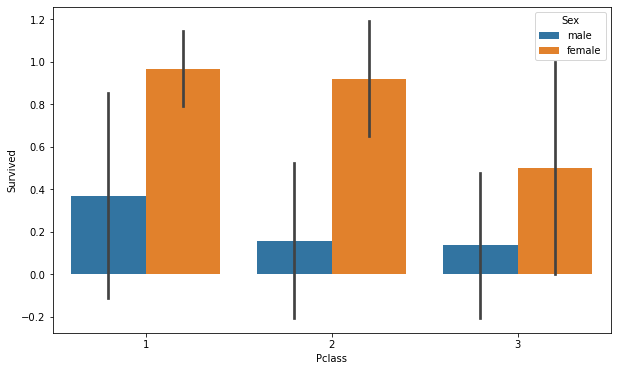

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', ci="sd") 
# hue로 그룹화가 된다.
# ci float 또는 "sd" 또는 None, 선택 사항
# 추정된 값을 그릴 신뢰 구간의 크기입니다. "sd"인 경우 부트스트랩을 건너뛰고 관측값의 표준 편차를 그립니다.

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

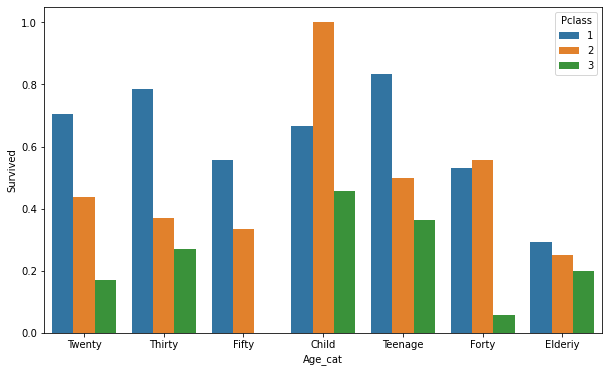

In [62]:
# 나이대별 Pclass별 생존율
# child에서 2 class는 전부 생존했다
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age_cat', y='Survived', hue='Pclass', ci=None)

<AxesSubplot:xlabel='Fare_bins', ylabel='Survived'>

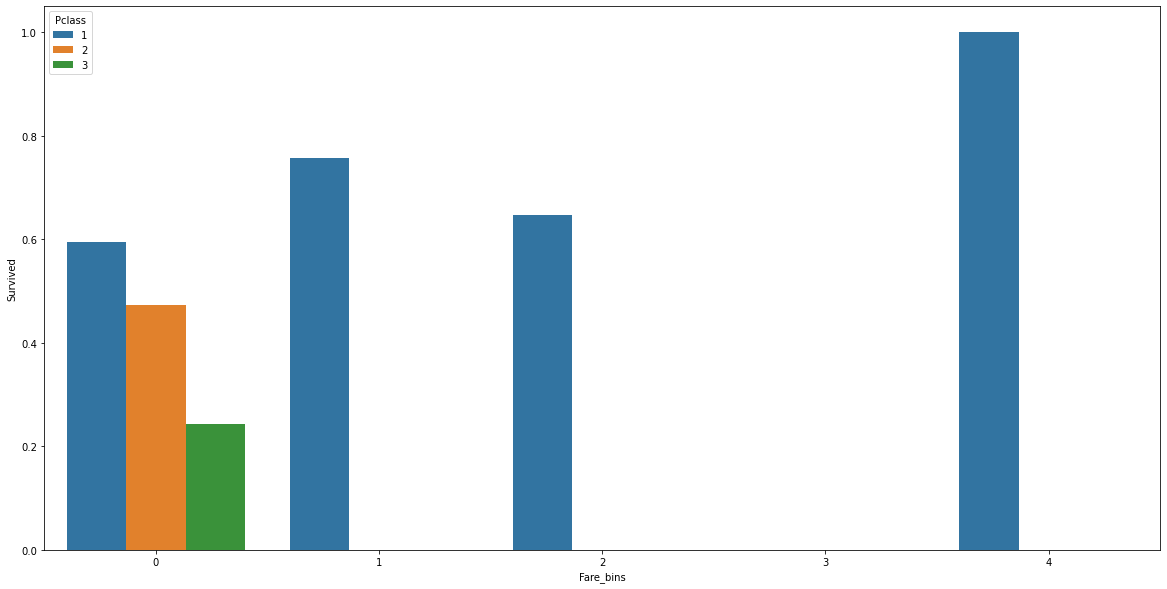

In [63]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Fare_bins', y='Survived', hue='Pclass', ci=None)

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

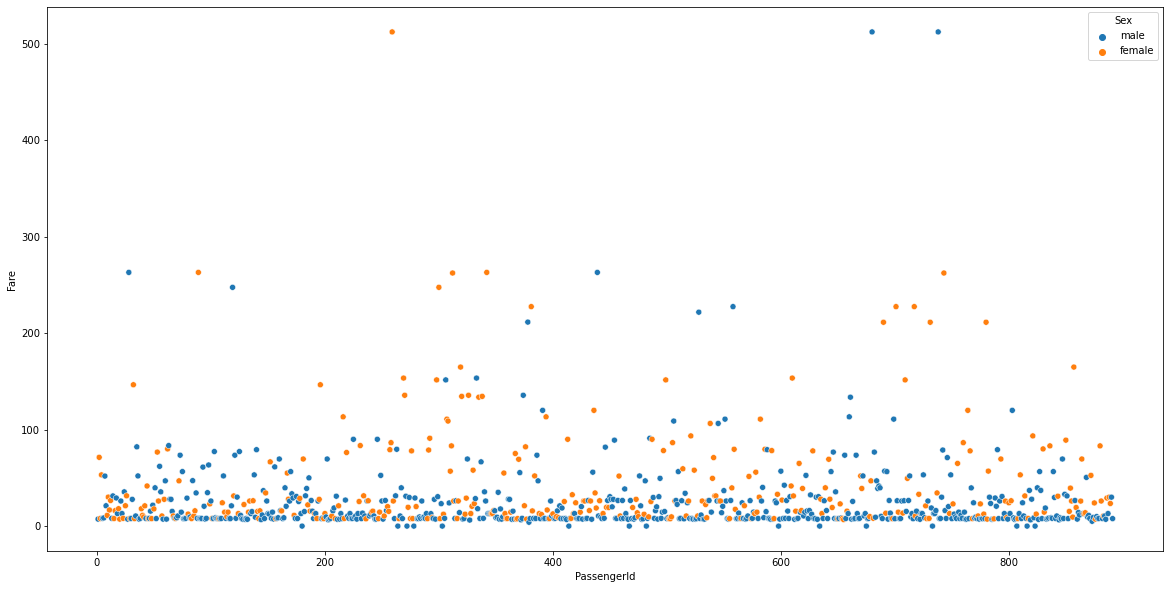

In [67]:
# 각 고객별로 어느정도의 요금을 가지고 있는지 파악
# 하위 20%가 전체를 대부분 차지함
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='PassengerId', y='Fare', hue='Sex')

In [70]:
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

def get_category(age):
    cat =''
    if age<10: 
        cat = 'Child'
    elif 10 <= age < 20:
        cat = 'Teenage'
    elif 20 <= age < 30:
        cat ='Twenty'
    elif 30 <= age < 40:
        cat = 'Thirty'
    elif 40 <= age < 50:
        cat = 'Forty'
    elif 50 <= age < 60:
        cat = 'Elderly'
    return cat

df = pd.read_csv('./dataset/train.csv')
df['Title'] = df.Name.apply(lambda x: re.search('([A-Za-z]+)\.', x).group(0).strip()) # Title에 정규표현식 적용 
df['Family'] = df['SibSp']+df['Parch'] # 열 병합 후  df['Family']로 넣어줌
df = df.drop(['SibSp', 'Parch'], axis=1) # 열 삭제
df = df.drop(['Ticket','Name','PassengerId','Cabin'], axis=1)
df['Age'] = df.groupby(['Pclass','Sex','Title'])['Age'].apply(lambda x: x.fillna(x.mean()))

df['Embarked'].fillna('S', inplace = True)
df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
cnt, bins = np.histogram(df.Fare, bins=5)

df['Fare_bins'] = pd.cut(x=df.Fare, bins=bins, labels=[0,1,2,3,4], include_lowest=True)
df = df.drop(['Age', 'Title'], axis=1)

features = ['Sex','Embarked', 'Age_cat'] # 라벨인코더
for feature in features:
    le = LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

# df = pd.get_dummies(df[['Pcalss','Sex','Embarked','Age_cat','Fare_bins']])
display(df)

,Survived,Pclass,Sex,Fare,Embarked,Family,Age_cat,Fare_bins
0,0,3,1,7.2500,2,1,6,0
1,1,1,0,71.2833,0,1,5,0
2,1,3,0,7.9250,2,0,6,0
3,1,1,0,53.1000,2,1,5,0
4,0,3,1,8.0500,2,0,5,0
...,...,...,...,...,...,...,...,...
886,0,2,1,13.0000,2,0,6,0
887,1,1,0,30.0000,2,0,4,0
888,0,3,0,23.4500,2,3,4,0
889,1,1,1,30.0000,0,0,6,0


In [82]:
from sklearn.model_selection import GridSearchCV
df1 = df.drop(['Survived'], axis=1) # 머신러닝 돌리기 위해 Survived 삭제

X_train, X_test, y_train, y_test = train_test_split(df1, df.Survived, test_size=0.2)

dtree = RandomForestClassifier()
parameters = {'max_depth': [3,4,5,6],
             'min_samples_split':[2,3,4,5,6,7]}

grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=5, refit=True) # 폴드 5번 
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)

display(scores_df[['params','mean_test_score','rank_test_score']])
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print(f'테스트 데이터',accuracy_score(y_test, pred))

,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'min_samples_split': 2}",0.800532,24
1,"{'max_depth': 3, 'min_samples_split': 3}",0.803349,23
2,"{'max_depth': 3, 'min_samples_split': 4}",0.806176,19
3,"{'max_depth': 3, 'min_samples_split': 5}",0.806097,21
4,"{'max_depth': 3, 'min_samples_split': 6}",0.804738,22
5,"{'max_depth': 3, 'min_samples_split': 7}",0.808963,18
6,"{'max_depth': 4, 'min_samples_split': 2}",0.814538,15
7,"{'max_depth': 4, 'min_samples_split': 3}",0.806107,20
8,"{'max_depth': 4, 'min_samples_split': 4}",0.818773,13
9,"{'max_depth': 4, 'min_samples_split': 5}",0.811750,16


테스트 데이터 0.8435754189944135


In [ ]:
# [과제] train.csv 데이터로 생존자 분석 예측을 위한 분석용 데이터셋을 하나의 전처리 사용자 함수를 이용하여 작성한 후 
# 모델링 및 성능 평가를 수행하세요. 단 (전처리는 5개 이상, 정확도는 0.85이상)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./dataset/train.csv')
df.head()

In [ ]:
# column별 null값 확인
df.isna().sum() # age, cabin, embarked에 각각 177, 687, 2개가 들어있음

In [ ]:
# Cabin, Embarked 내용 확인
print(df['Cabin'].value_counts(),'\n')
print(df.Embarked.value_counts())

In [77]:
# null값 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True) # 평균
    df['Cabin'].fillna(df['Cabin'].mode()[0], inplace= True) # 최빈값
    df['Embarked'].fillna(method='ffill', inplace=True) # 앞의 값
    df['Fare'].fillna(0, inplace = True)
    return df

In [ ]:
# null값 제거 확인
df.isnull().sum().sum()

In [ ]:
df.info()

In [ ]:
# 구성 값 확인 후 -> drop or labelEncoder
# drop의 기준은?  -> 주민번호나 단순 문자열 아이디와 같은 경우 인코딩하지 않고 삭제하는 게 더 좋다  
# why? -> 이러한 식별자 피처는 단순히 데이터 로우를 식별하는 용도로 사용되기 때문에 
# 예측에 중요한 요소가 될 수 없으며 알고리즘을 오히려 복잡하게 만들고 예측 성능을 떨어뜨리기 때문
print(df['PassengerId'].value_counts(),'\n') # drop
print(df.Name.value_counts(),'\n') # drop
print(df.Sex.value_counts(),'\n') # labelEncoder
print(df.Ticket.value_counts(),'\n') # drop
print(df.Cabin.value_counts(),'\n') # labelEncoder
print(df.Embarked.value_counts()) # labelEncoder

In [78]:
# 불필요한 속성들 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

In [79]:
# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 도메인 요소 왜 첫글자만 추출하는가 > 당시 부의 차별 대우가 더 심했던 시절 > 삼등석 탑승객보다 일등석 탑승객이 생존할 확률이 더 높았을거라는 추측
    features = ['Cabin','Sex','Embarked'] # 레이블 인코딩할 리스트
    
    for feature in features: # features에서 하나씩 뽑아 인코딩해줌
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature]) 
    return df

In [80]:
# 앞에서 설정한 Data Preprocessing 함수들 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

transform_features(tt_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,1,2
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,1,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,1,2
887,1,1,0,19.000000,0,0,30.0000,1,2
888,0,3,0,29.699118,1,2,23.4500,1,2
889,1,1,1,26.000000,0,0,30.0000,2,0


In [75]:
tt_df = pd.read_csv('./dataset/train.csv')
tt_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y = tt_df['Survived'] # 종속변수(결과) -> 레이블 데이터
x = tt_df.drop('Survived',axis=1) # 독립변수(설명변수) -> 피처 데이터 세트

# 학습용 데이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 모델 학습 및 평가 -> GridSearchCV() 
from sklearn.model_selection import GridSearchCV

# 파라미터를 딕셔너리 형태로 설정
# decisiontreeclassifier의 중요 하이퍼 파라미터들을 변화시키면서 최적화 수행
parameters = {'max_depth': [2, 3, 5, 10],
             'min_samples_split': [2, 3, 5],
             'min_samples_leaf': [1, 5, 8]
             }

# GridSearchCV 주요 파라미터 -> estimator, param_gird, scoring, cv, refit(true가 default)
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5, refit=True)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: ', round(grid_dclf.best_score_, 4))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:' , round(accuracy, 4))
# test data = 0.8771 
# train data = 0.8062 -> 과소적합

(712, 8)
(712,)
(179, 8)
(179,)
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.8062
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8771
